#<font color="red">**Greenhouse workshop**</font>

##your name: first last


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
ls drive/MyDrive/Colab


ARGO_floats.ipynb            greenhouse_workshop.ipynb             temperature_variables.pickle
greenhouse.ipynb             introduction_python_variables.pickle  temperature_workshop.ipynb
greenhouse_variables.pickle  introduction_python_workshop.ipynb


In [16]:
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt
import matplotlib
import pickle
from matplotlib.ticker import MultipleLocator
import scipy as scipy
from scipy import optimize
import warnings
import pandas as pd

# load the data from a pickle file:
with open('./drive/MyDrive/Colab/greenhouse_variables.pickle', 'rb') as file:
    d = pickle.load(file)
    # print information about each extracted variable:
    for key in list(d.keys()):
        print("extracting pickled variable: name=", key,"; size=", d[key].shape)
        #print("; type=",type(d[key]))
    globals().update(d)

extracting pickled variable: name= CO2_observed ; size= (78,)
extracting pickled variable: name= CO2_observed_years ; size= (78,)
extracting pickled variable: name= CO2_rcp26 ; size= (101,)
extracting pickled variable: name= CO2_rcp45 ; size= (101,)
extracting pickled variable: name= CO2_rcp6 ; size= (101,)
extracting pickled variable: name= CO2_rcp85 ; size= (101,)
extracting pickled variable: name= CO2_rcp85_years ; size= (101,)
extracting pickled variable: name= OLR_280ppm_CO2_only ; size= (19960,)
extracting pickled variable: name= OLR_560ppm_CO2_only ; size= (19960,)
extracting pickled variable: name= wavenumbers ; size= (19960,)


## Explanation of variables:

- **CO2_observed** is a time series of observed CO$_2$, as a function of time in years given by variable **CO2_observed_years**.

- **CO2_rcp*** are time series of projected CO$_2$ according to different RCP scenarios. Years are the same for all scenarios and are contained in **CO2_rcp85_years**.

- **OLR_280ppm_CO2_only** is the top-of-the-atmopshere outgoing longwave radiation, with 280 ppm of CO2, as function of **wavenumbers**, that are given by the variable of that name. Same for **OLR_560ppm_CO2_only**.

##<font color="blue"> 1) Observed and projected increase in greenhouse gases:</font>

Plot CO$_2$ concentration since 1850, superimpose the predicted CO$_2$ concentration from the RCP8.5 (sometimes referred to as ``business as usual'') scenario from a previous IPCC report going to 2100.

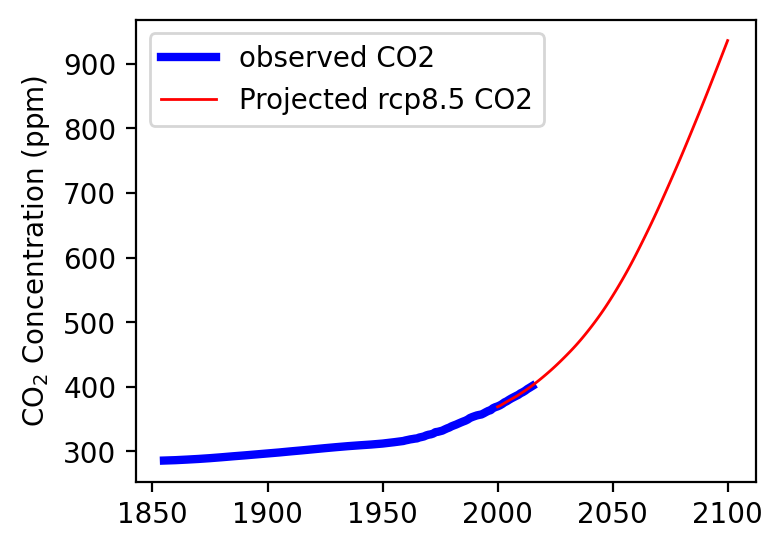

In [12]:
fig = plt.figure(1,figsize=(4,3),dpi=200)
plt.plot(CO2_observed_years,CO2_observed,lw=3,color="blue",label="observed CO2")
plt.plot(CO2_rcp85_years,CO2_rcp85,lw=1,color="red",label="Projected rcp8.5 CO2")

plt.legend()
#plt.xlabel(XX)
plt.ylabel('CO$_2$ Concentration (ppm)');

##<font color="green"> 2) (YOUR TURN) Observed and projected increase in greenhouse gases:</font>

Copy and paste the code from above. Add: RCP2.6 scenario (green), RCP4.5 (orange), RCP6 (magenta).

##<font color="blue"> 2) Print observed CO$_2$ values in a 1x1 table (row=years, column=CO$_2$ values):</font>


In [45]:
#let's take a look at data
CO2_observed
#CO2_observed_years#.astype(int)
CO2_rcp85

array([368.865  , 370.4675 , 372.5225 , 374.76   , 376.8125 , 378.8125 ,
       380.8275 , 382.7775 , 384.8    , 387.01226, 389.32416, 391.63801,
       394.00866, 396.46384, 399.00402, 401.62793, 404.32819, 407.09588,
       409.92701, 412.82151, 415.78022, 418.79629, 421.86439, 424.99469,
       428.19734, 431.47473, 434.82619, 438.24456, 441.7208 , 445.25085,
       448.83485, 452.47359, 456.177  , 459.96398, 463.85181, 467.85003,
       471.96047, 476.18237, 480.50799, 484.92724, 489.43545, 494.03235,
       498.7297 , 503.52959, 508.43266, 513.45614, 518.61062, 523.90006,
       529.32418, 534.8752 , 540.54279, 546.32201, 552.21189, 558.2122 ,
       564.31311, 570.51669, 576.84343, 583.30471, 589.90539, 596.64656,
       603.52045, 610.5165 , 617.60526, 624.76367, 631.99471, 639.29052,
       646.65274, 654.09843, 661.64491, 669.30474, 677.07762, 684.95429,
       692.90196, 700.89416, 708.93159, 717.01548, 725.13597, 733.30667,
       741.52368, 749.80466, 758.1823 , 766.64451, 

In [51]:
#build a pandas dataframe
df=pd.DataFrame({'column':CO2_observed},index=CO2_observed_years.astype(int))
df

column
1855  285.70
1860  286.30
1865  287.20
1870  288.20
1875  289.40
...      ...
2011  391.63
2012  393.82
2013  396.48
2014  398.61
2015  400.83

[78 rows x 1 columns]

In [52]:
#rename the "column" with the name of the observations (OBS)
df.rename(columns={df.columns[0]: "OBS"}, inplace=True)

In [53]:
df

OBS
1855  285.70
1860  286.30
1865  287.20
1870  288.20
1875  289.40
...      ...
2011  391.63
2012  393.82
2013  396.48
2014  398.61
2015  400.83

[78 rows x 1 columns]

##<font color="green"> 2) (YOUR TURN) Make a table 1x4 (1 row for years, 4 columns for each RCP scenario) with CO$_2$ values :</font>

Start from the code used above. Add: RCP2.6 , RCP4.5, RCP6, and RCP8.5 data in a new dataframe.

In [58]:
# answer here

##<font color="green"> 3) (YOUR TURN) At which year do curves/data among the RCP scenarios start being different?</font>
